<a href="https://colab.research.google.com/github/lc0/deeplearning-playground/blob/master/charts/Seaborn-hide_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id = 'YOUR-PROJECT-ID'

In [16]:
%%bigquery --project {project_id} names

SELECT * FROM
(
  SELECT
    name,
    year,
    gender,
    SUM(number) as used_times,
    count(*) over(partition by name) as years_used,
    SUM(SUM(number)) over(partition by name) as name_total
  FROM
    `bigquery-public-data.usa_names.usa_1910_current`
  WHERE gender = 'F'
  GROUP BY year, name, gender
)
WHERE years_used = 108
ORDER BY name_total DESC
LIMIT 1080

,name,year,gender,used_times,years_used,name_total
0,Mary,1975,F,10968,108,3738739
1,Mary,2004,F,4806,108,3738739
2,Mary,1929,F,63510,108,3738739
3,Mary,1962,F,43488,108,3738739
4,Mary,1911,F,24390,108,3738739
5,Mary,1981,F,11043,108,3738739
6,Mary,1979,F,10559,108,3738739
7,Mary,1997,F,6632,108,3738739
8,Mary,1933,F,55507,108,3738739
9,Mary,1994,F,7747,108,3738739


In [17]:
names_one = names[names.name == 'Mary']
names_one.head()

,name,year,gender,used_times,years_used,name_total
0,Mary,1975,F,10968,108,3738739
1,Mary,2004,F,4806,108,3738739
2,Mary,1929,F,63510,108,3738739
3,Mary,1962,F,43488,108,3738739
4,Mary,1911,F,24390,108,3738739


In [0]:
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


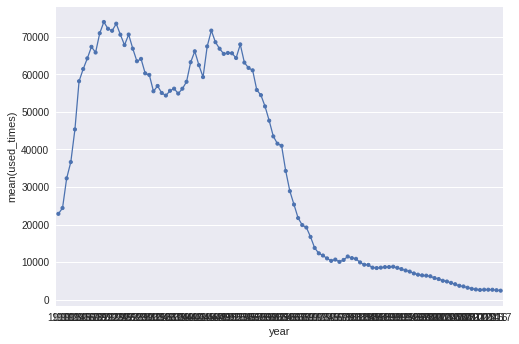

In [34]:
sns.pointplot(x="year", y="used_times", data=names_one, scale=0.4)

Ufortunately all **X** labels are mixed together, not readable at all. Even if we rotate them vertically.

## Show only every n-th label tick

Fortunately it's possible to manually hide the labels. 
In this case we take the number of rows and show only 20 labels per graph.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


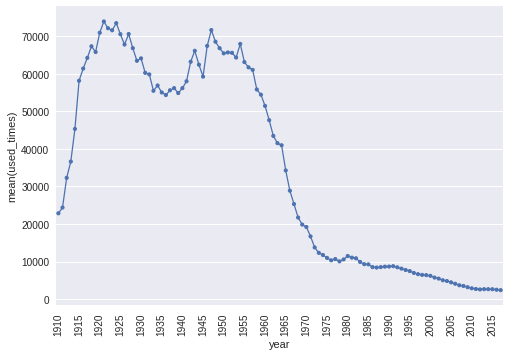

In [35]:
pl1 = sns.pointplot(x="year", y="used_times", data=names_one, scale=0.4)

nth_tick = names_one.shape[0] // 20
[l.set_visible(False) for (i,l) in enumerate(pl1.get_xticklabels()) if i % nth_tick != 0]

pl1.set_xticklabels(pl1.get_xticklabels(), rotation = 90)

sns.plt.show()

In case we would like to group by name, we would need to take a frequency of a group member

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


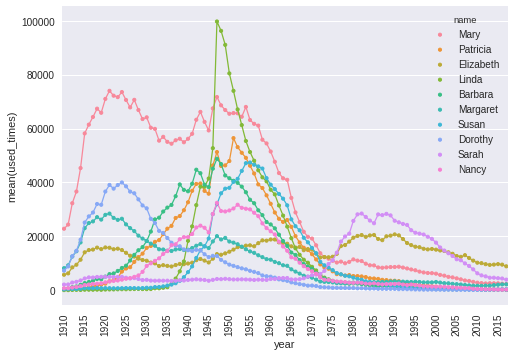

In [33]:
pl1 = sns.pointplot(x="year", y="used_times", data=names, hue="name", scale=0.4)


nth_tick = names.name.describe().freq // 20
[l.set_visible(False) for (i,l) in enumerate(pl1.get_xticklabels()) if i % nth_tick != 0]

pl1.set_xticklabels(pl1.get_xticklabels(), rotation = 90)

sns.plt.show()